/opt/homebrew/Cellar/jupyterlab/4.0.8_1/libexec/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


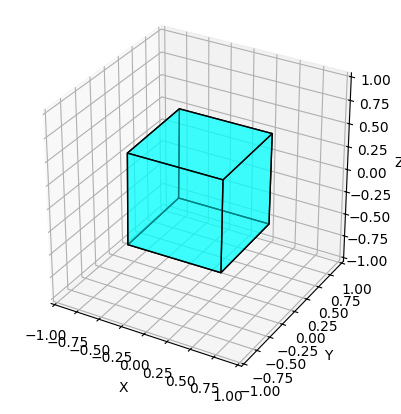

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import FuncAnimation
from scipy.spatial.transform import Rotation as Rscipy

# --- Simulation Parameters ---
n_steps = 300
dt = 0.03

omega = np.array([0.0, 0.5, 1.0])  # Spin axis

R = Rscipy.identity()
rotations = []
for _ in range(n_steps):
    rotvec = omega * dt
    dR = Rscipy.from_rotvec(rotvec)
    R = R * dR
    rotations.append(R.as_matrix())

# --- Cube geometry ---
cube_definition = np.array([
    [-0.5, -0.5, -0.5],
    [+0.5, -0.5, -0.5],
    [+0.5, +0.5, -0.5],
    [-0.5, +0.5, -0.5],
    [-0.5, -0.5, +0.5],
    [+0.5, -0.5, +0.5],
    [+0.5, +0.5, +0.5],
    [-0.5, +0.5, +0.5]
])

def get_cube_faces(cube):
    faces = [
        [cube[j] for j in [0,1,2,3]],
        [cube[j] for j in [4,5,6,7]],
        [cube[j] for j in [0,1,5,4]],
        [cube[j] for j in [2,3,7,6]],
        [cube[j] for j in [1,2,6,5]],
        [cube[j] for j in [4,7,3,0]]
    ]
    return faces

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Draw initial cube and keep a reference to Poly3DCollection
cube = cube_definition @ rotations[0].T
faces = get_cube_faces(cube)
cube_poly = Poly3DCollection(faces, facecolors='cyan', edgecolors='k', linewidths=1, alpha=0.5)
ax.add_collection3d(cube_poly)

def update(frame):
    global cube_poly
    # Remove the old cube from the plot
    cube_poly.remove()
    cube = cube_definition @ rotations[frame].T
    faces = get_cube_faces(cube)
    cube_poly = Poly3DCollection(faces, facecolors='cyan', edgecolors='k', linewidths=1, alpha=0.5)
    ax.add_collection3d(cube_poly)
    return (cube_poly,)

ani = FuncAnimation(fig, update, frames=len(rotations), interval=30, blit=False)
plt.show()